In [1]:
from sklearn.cluster import DBSCAN

In [2]:
import sys
from ctypes import *
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import numpy as np
import pickle as pkl

In [3]:
sys.path.append('/Users/rsingh/Packages/darknet/')
sys.path.append('/Users/rsingh/Packages/darknet/python/')
sys.path.append('/Users/rsingh/Oyla/Work/our_python_dev/')
from oyla.mvc.filters import *
from oyla.mvc.utils import *

In [4]:
import darknet as dn
import open3d as o3d
import os

In [5]:
cd ~/Packages/darknet/

/Users/rsingh/Packages/darknet


In [268]:
dir_path = "/Users/rsingh/Data/44x33/oyla_1_camera_v2/07_Feb_data_February_07_18_54_22//"

In [269]:
with open(dir_path+"/kitti/2d/ergb_fs_reflectivity_comp_supress_saturation_minmax_scaling_/yolo_2.pkl",'rb') as fp:
    ydata_2 = pkl.load(fp)
with open(dir_path+"/kitti/2d/ergb_fs_reflectivity_comp_supress_saturation_minmax_scaling_/yolo.pkl",'rb') as fp:
    ydata = pkl.load(fp)

In [270]:
input_data_folder_name =  dir_path
csv_file = input_data_folder_name+'/parameters.csv'
parameters = read_csv_parameters(csv_file)
filter_params = {}
ambiguity_distance, range_max, range_min, saturation_flag, adc_flag, mod_freq, ampl_min,reflectivity_thresh = some_common_utility(parameters,0)
reflectivity_thresh=0

dict_keys(['Section', 'Type', 'Key', 'Argument Format', 'Value', 'Command Group', 'Description'])


In [271]:
filter_params = {}
filter_parameters = {}
filter_parameters['filter_cmd'] = {}
filter_parameters = read_csv_parameters("/Users/rsingh/Oyla/Work/our_python_dev/oyla/mvc/filter_params.csv")
for k in filter_parameters['filter_cmd'].keys():
        #print(parameters['filter_cmd'][k][self.epoch_number])
        try:
                filter_params[k] = int(filter_parameters['filter_cmd'][k][0])
                #parameters['filter_cmd'][k][0] = filter_parameters['filter_cmd'][k][0]
        except ValueError:
                pass
filter_params = {}

dict_keys(['Section', 'Type', 'Key', 'Argument Format', 'Value', 'Command Group', 'Description'])


In [310]:
index = np.random.randint(0,1000)
index = 611
#index = 502
#index = 145#, 146, 149, 150, 151, 156, 157, 177, 193, 276, 647,
       #649, 650, 655, 661, 690, 698, 700, 725, 768, 770, 784, 815, 816,
       #818, 819, 821, 822, 823, 833, 909, 917, 919, 921, 931]
print(index)
pcd = o3d.io.read_point_cloud(os.path.join(dir_path,'kitti/')+'/3d/oyla_'+str(index).zfill(4)+'.xyz',format='xyz')
data = scipy.io.loadmat(dir_path+'/data_1_'+str(index)+'.mat')['data']
data2 = scipy.io.loadmat(dir_path+'/data_1_'+str(index+1)+'.mat')['data']
rgb = data2[0][4]
raw_phase = data[0][2][0][0][:,:,0]
raw_ampl = data[0][2][0][0][:,:,1]
rgb,raw_phase,raw_ampl = camera_calibrations(rgb,depth=raw_phase,ampl=raw_ampl,camera_version='oyla_1_camera_v2')
#_rgb = cv2.resize(rgb,None,fx=120/212,fy=120/212)

filtered_phase, thresholded_ampl, indices = threshold_filter(raw_phase = raw_phase, raw_ampl = raw_ampl, reflectivity_thresh= reflectivity_thresh,
                                                            range_max = range_max, range_min = range_min, ampl_min = ampl_min,
                                                            filter_params = filter_params, ambiguity_distance = ambiguity_distance)
#filtered_phase = np.rot90(filtered_phase)
#thresholded_ampl = np.rot90(thresholded_ampl)
_filtered_phase = filtered_phase.astype('float32')/np.max(filtered_phase)
_thresholded_ampl = thresholded_ampl.astype('float32')/np.max(thresholded_ampl)
_rgb = cv2.resize(rgb,(_filtered_phase.shape[1],_filtered_phase.shape[0]))
_rgb = _rgb.astype('float32')/255.0
dist,_ = phase_to_distance(filtered_phase,ambiguity_distance)

611


In [311]:
path= dir_path+"/kitti/2d/ergb_fs_reflectivity_comp_supress_saturation_minmax_scaling_//oyla_"+str(index).zfill(4)+".png"
pathb = path.encode('utf-8')
#im = dn.load_image(pathb,0,0)

In [312]:
resO = ydata_2["oyla_"+str(index).zfill(4)+".png"]["before"]
res = ydata_2["oyla_"+str(index).zfill(4)+".png"]["after"]
results = ydata["oyla_"+str(index).zfill(4)+".png"]

In [313]:
resO

[('person',
  0.8887292742729187,
  (147.27081298828125,
   126.50741577148438,
   13.66685676574707,
   22.6461181640625)),
 ('person',
  0.6428417563438416,
  (144.19239807128906,
   125.45823669433594,
   8.502779960632324,
   21.18352508544922)),
 ('person',
  0.39740926027297974,
  (148.921630859375,
   125.21249389648438,
   10.115130424499512,
   20.40827751159668)),
 ('person',
  0.15694157779216766,
  (144.30416870117188,
   127.15116882324219,
   7.076649188995361,
   19.783395767211914))]

In [314]:
results

[('person',
  0.8887292742729187,
  (147.27081298828125,
   126.50741577148438,
   13.66685676574707,
   22.6461181640625))]

In [315]:
gray = cv2.cvtColor(_rgb,cv2.COLOR_RGB2GRAY)

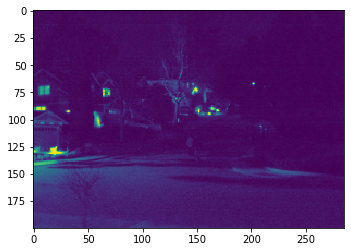

In [316]:
plt.imshow(gray)

In [317]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()


0 1 ('person', 0.8887292742729187, (147.27081298828125, 126.50741577148438, 13.66685676574707, 22.6461181640625)) 196
('person', 0.8887292742729187, (147.27081298828125, 126.50741577148438, 13.66685676574707, 22.6461181640625))


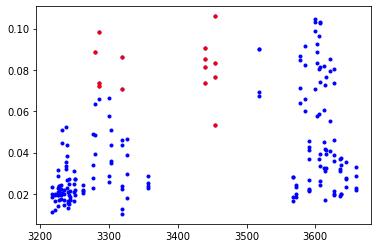

In [321]:
for j,r in enumerate(resO):
    if r[0] != 'person':
        continue
    a = np.zeros_like(gray)
    (centerX, centerY, width, height) = r[2]
    bb = (int(centerX - (width / 2))-1, int(centerY - (height / 2))-1, int(centerX +(width / 2))+1,int(centerY + (height / 2))+1)
    #index = np.meshgrid(np.arange(bb[1],bb[3]),np.arange(bb[0],bb[2]))
    #index=np.ravel_multi_index(index,gray.shape)
    a[bb[1]:bb[3],bb[0]:bb[2]] = 1
    d = dist*a
    g = gray*a
    index = np.where(d>0)
    X = d[index]
    Y = g[index]
    #X = dist[tuple(index)]
    #Y = gray[tuple(index)]
    #print(np.where(X>0),X.shape,index)
    
    #Y = Y[X>0]
    X = X[X>0]   
    #X = X.reshape(-1,1)
    #Z = scipy.cluster.vq.whiten(np.vstack((X,Y)).transpose())
    
    if len(X)>0:
        #print(np.mean(X))
        scaler.fit(np.vstack((X,Y)).transpose())
        Z = scaler.transform(np.vstack((X,Y)).transpose())
        clustering = DBSCAN(eps=0.2, min_samples=len(X)/8).fit(Z)
        print(j,np.max(clustering.labels_),r,len(X))
        plt.plot(X,Y,'b.')
        plt.plot(X[np.where(clustering.labels_==-1)],Y[np.where(clustering.labels_==-1)],'r.')
        if j==0:
            break
print(r)       

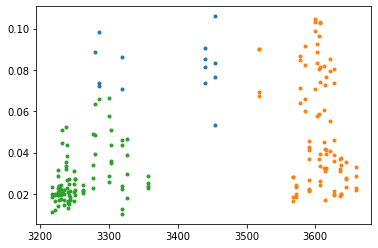

In [322]:
#plt.plot(X,Y,'b.')
for l in range(-1,max(clustering.labels_)+1):
    plt.plot(X[np.where(clustering.labels_==l)],Y[np.where(clustering.labels_==l)],'.')

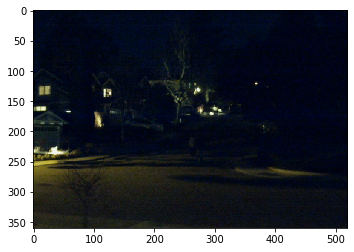

In [327]:
_gray = np.zeros_like(gray)
__rgb = rgb.copy()
for l in range(max(clustering.labels_)+1):
    gray[np.unravel_index(np.ravel_multi_index(index,gray.shape)[np.where(clustering.labels_==l)],gray.shape)] = (l+1)/np.max(clustering.labels_)
    __rgb[np.unravel_index(np.ravel_multi_index(index,gray.shape)[np.where(clustering.labels_==l)],gray.shape),0] = (l+1)/np.max(clustering.labels_)
    __rgb[np.unravel_index(np.ravel_multi_index(index,gray.shape)[np.where(clustering.labels_==l)],gray.shape),1] = (l+1)/np.max(clustering.labels_)
    __rgb[np.unravel_index(np.ravel_multi_index(index,gray.shape)[np.where(clustering.labels_==l)],gray.shape),2] = (l+1)/np.max(clustering.labels_)
plt.imshow(__rgb)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


('person', 0.18483272194862366, (144.1306915283203, 126.99345397949219, 7.2945427894592285, 20.739524841308594))


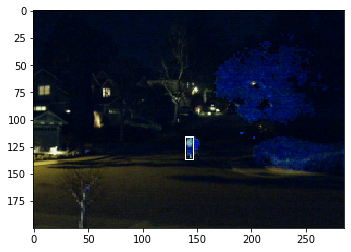

In [302]:
frame = plt.imread(path)
#r = resO[5]
#for r in resO:
print(r)
(centerX, centerY, width, height) = r[2]

_=cv2.rectangle(frame, (int(centerX - (width / 2)), int(centerY - (height / 2))), (int(centerX +(width / 2)),int(centerY + (height / 2))), (0,255,0), 1)
plt.imshow(frame)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


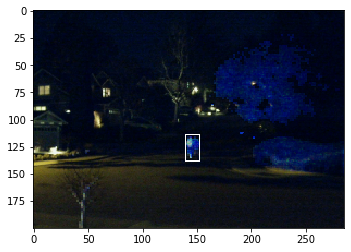

In [303]:
frame = plt.imread(path)
for r in results:
    (centerX, centerY, width, height) = r[2]

    _=cv2.rectangle(frame, (int(centerX - (width / 2)), int(centerY - (height / 2))), (int(centerX +(width / 2)),int(centerY + (height / 2))), (0,255,0), 1)
plt.imshow(frame)

(array([4., 0., 0., 0., 0., 0., 0., 0., 3., 0., 0., 4., 0., 0., 4., 0., 0.,
        0., 0., 0., 3., 0., 0., 0., 1.]),
 array([4088.    , 4094.5933, 4101.1865, 4107.78  , 4114.3735, 4120.967 ,
        4127.56  , 4134.1533, 4140.7466, 4147.34  , 4153.9336, 4160.527 ,
        4167.12  , 4173.7134, 4180.3066, 4186.9   , 4193.4937, 4200.087 ,
        4206.68  , 4213.2734, 4219.8667, 4226.46  , 4233.0537, 4239.647 ,
        4246.24  , 4252.8335], dtype=float32),
 <a list of 25 Patch objects>)

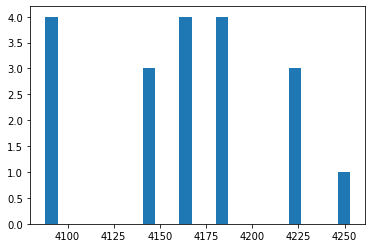

In [267]:
plt.hist(X[np.where(clustering.labels_!=-1)],25)

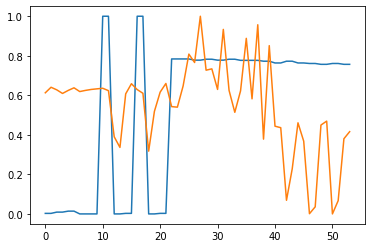

In [138]:
plt.plot(Z)


In [140]:
num = []
rnum = []
for index in range(1000):   
    data = scipy.io.loadmat(dir_path+'/data_1_'+str(index)+'.mat')['data']
    data2 = scipy.io.loadmat(dir_path+'/data_1_'+str(index+1)+'.mat')['data']
    rgb = data2[0][4]
    raw_phase = data[0][2][0][0][:,:,0]
    raw_ampl = data[0][2][0][0][:,:,1]
    rgb,raw_phase,raw_ampl = camera_calibrations(rgb,depth=raw_phase,ampl=raw_ampl,camera_version='oyla_1_camera_v2')
    #_rgb = cv2.resize(rgb,None,fx=120/212,fy=120/212)

    filtered_phase, thresholded_ampl, indices = threshold_filter(raw_phase = raw_phase, raw_ampl = raw_ampl, reflectivity_thresh= reflectivity_thresh,
                                                                range_max = range_max, range_min = range_min, ampl_min = ampl_min,
                                                                filter_params = filter_params, ambiguity_distance = ambiguity_distance)
    #filtered_phase = np.rot90(filtered_phase)
    #thresholded_ampl = np.rot90(thresholded_ampl)
    _filtered_phase = filtered_phase.astype('float32')/np.max(filtered_phase)
    _thresholded_ampl = thresholded_ampl.astype('float32')/np.max(thresholded_ampl)
    _rgb = cv2.resize(rgb,(_filtered_phase.shape[1],_filtered_phase.shape[0]))
    _rgb = _rgb.astype('float32')/255.0
    dist,_ = phase_to_distance(filtered_phase,ambiguity_distance)
    resO = ydata_2["oyla_"+str(index).zfill(4)+".png"]["before"]
    #res = ydata_2["oyla_"+str(index).zfill(4)+".png"]["after"]
    results = ydata["oyla_"+str(index).zfill(4)+".png"]
    n = 0
    _n = 0
    for j,r in enumerate(resO):
        if r[0] != 'person':
            continue
        (centerX, centerY, width, height) = r[2]
        bb = (int(centerX - (width / 2))-1, int(centerY - (height / 2))-1, int(centerX +(width / 2))+1,int(centerY + (height / 2))+1)
        X = dist[bb[1]:bb[3],bb[0]:bb[2]]
        #Y = gray[bb[1]:bb[3],bb[0]:bb[2]]
        #Y = Y[X>0]
        X = X[X>0]   
        X = X.reshape(-1,1)
        if len(X)>0:
            clustering = DBSCAN(eps=75, min_samples=len(X)/8).fit(X)
            print(j,np.max(clustering.labels_),np.mean(X),np.std(X),len(X),len(results))
            n += np.max(clustering.labels_)
            _n += 1
    if _n == 0:
        _n = 1
    num.append(n/_n)
    rnum.append(len(results))
    print('\n',index)

13 0 4114.958 44.301537 32 5

 0
9 1 3902.611 269.06052 48 4
15 0 4022.2168 32.051712 40 4
16 1 3844.9236 303.30756 48 4

 1

 2

 3
14 0 1046.8192 120.235954 567 4

 4

 5

 6

 7
23 1 3834.806 66.86249 12 7
26 0 3786.589 77.23521 41 7
27 1 3856.5 71.90208 16 7

 8
25 0 3720.1274 78.79825 59 5
26 0 3713.044 75.83729 38 5

 9
21 0 3663.7383 59.0332 56 6
23 1 3679.4504 73.47444 27 6
27 1 3677.7446 71.25821 30 6

 10

 11
23 1 3528.0625 158.55725 85 6
24 1 3534.704 162.174 49 6

 12
24 0 3613.6428 20.297674 14 3
25 0 3618.75 23.304 16 3

 13

 14
24 0 3519.8845 29.962292 26 4
26 0 3513.1477 30.522272 36 4

 15
27 0 3514.6072 42.696518 56 3

 16
25 0 3447.9998 479.1803 66 5
28 0 3545.1191 79.569855 42 5
30 0 3521.8665 56.75909 60 5
31 0 3541.667 79.33391 44 5
36 1 3276.4883 145.62894 56 5

 17
21 0 3442.5522 472.25363 70 4
24 0 3522.5293 75.5755 68 4

 18
24 0 3512.6296 68.99234 18 3
25 0 3498.1428 65.295166 28 3

 19

 20
22 0 3494.2942 54.937653 34 2

 21

 22
20 0 3454.8333 48.611683 4

15 1 3999.8667 67.344864 20 3

 250
11 1 2975.8389 1565.896 62 3

 251

 252
13 1 3220.0159 1377.1448 62 3

 253

 254
12 1 2698.544 1796.1503 76 3
14 1 2973.293 1661.0402 74 3

 255
13 1 2640.037 1825.0626 72 4

 256

 257

 258
15 1 2722.0735 1705.9894 68 3
16 1 2730.353 1711.1713 68 3

 259
17 1 2575.5928 1762.5157 72 4

 260
17 1 2581.4026 1765.2383 72 5
19 1 2652.022 1744.0841 76 5

 261
16 1 2511.1716 1796.6055 68 4
17 1 2520.3435 1803.1403 68 4

 262
16 1 2728.5146 1704.6042 68 4

 263
16 1 2510.7644 1788.4535 68 4

 264
16 1 2587.69 1769.1499 72 5

 265
16 1 2591.3936 1768.511 72 4
17 1 2877.6907 1642.7437 70 4

 266
15 1 2652.0833 1745.8301 76 5
17 1 2926.3333 1615.2191 74 5

 267
18 1 2738.5933 1707.4076 68 4
19 1 3003.4785 1571.7499 62 4

 268
18 0 4422.056 15.3793335 12 5
19 0 4422.056 15.3793335 12 5
20 1 2444.816 1804.3191 76 5
21 1 2454.632 1811.7598 76 5

 269
15 0 4429.2334 26.829649 20 4
16 0 4429.2334 26.829649 20 4
17 1 2441.9692 1812.0693 76 4
18 0 4429.2334 26.829

26 1 4750.976 93.2693 28 5
29 1 4750.976 93.2693 28 5
30 1 3536.3 184.33827 40 5

 439
22 0 4723.3804 60.600796 28 5
25 0 4723.3804 60.600796 28 5

 440
18 0 4677.611 42.52564 24 5
21 0 4677.611 42.52564 24 5

 441
18 1 4699.5625 95.49519 32 5
21 1 4699.5625 95.49519 32 5

 442

 443

 444

 445
17 0 1108.0667 12.229566 40 5

 446
16 0 1124.7115 20.39715 52 5

 447
15 0 1151.9358 16.898676 65 5
16 0 1142.552 13.660155 32 5
17 0 1140.3167 13.610551 40 5

 448

 449

 450

 451

 452

 453

 454

 455

 456

 457

 458

 459

 460

 461

 462

 463

 464

 465

 466

 467
20 0 4421.759 31.916048 36 5

 468
22 0 4432.4814 72.43652 36 6

 469

 470

 471

 472
19 0 4356.037 22.132366 36 6

 473
19 1 3943.0 92.63099 6 5

 474
18 1 3952.0554 71.26057 6 5

 475

 476
20 0 3811.1665 0.0 4 6

 477

 478

 479
28 0 4280.6113 27.064663 36 5

 480
28 0 4260.35 29.803905 40 5
31 0 4260.35 29.803905 40 5

 481
22 0 3775.6667 0.0 4 5
26 0 4263.683 39.861794 40 5

 482
20 0 3737.8333 0.0 4 5

 483
22 

17 0 3655.3306 80.82098 122 4
18 0 3646.058 70.48615 98 4

 533
11 1 3685.9026 102.63767 154 4
13 0 3836.0833 46.10552 64 4
14 0 3674.0437 91.67636 152 4
15 1 3671.7327 93.74345 119 4
17 0 3697.275 91.18422 40 4

 534
9 0 3820.9585 41.684902 64 5
10 0 3820.9585 41.684902 64 5
14 0 3669.3677 93.11241 154 5
16 0 3820.9585 41.684902 64 5
17 0 3820.9585 41.684902 64 5
18 0 3656.6484 80.898575 144 5
19 0 3657.3474 70.73431 96 5

 535
9 0 3835.6821 53.709213 88 4
13 1 3670.5227 103.954 148 4
14 0 3835.6821 53.709213 88 4
15 0 3654.6907 89.740776 140 4
16 0 3646.8054 78.76796 94 4

 536
9 0 3826.9546 49.538227 88 4
14 1 3666.7327 101.43762 152 4
15 0 3822.975 50.05734 80 4
16 0 3826.9546 49.538227 88 4
17 0 3653.631 92.37675 142 4
18 0 3646.0781 85.70474 98 4
19 0 3643.3083 59.290047 52 4

 537
10 0 3829.0273 49.305225 96 4
13 0 3649.918 95.75077 138 4
14 0 3812.2542 39.448586 76 4
17 0 3629.3525 69.83009 126 4
18 0 3620.315 60.2783 90 4
19 0 3620.2917 48.84948 48 4

 538
11 0 3814.925 41.533

6 0 3584.21 45.333286 86 4
11 0 3341.4258 41.354553 144 4
12 0 3340.6697 62.992043 119 4
13 0 3321.0488 30.888079 62 4
14 0 3582.1511 43.838657 84 4
15 0 3339.219 39.50346 140 4
16 0 3341.4268 42.17569 82 4

 582
5 0 3590.1953 63.959595 92 5
10 0 3335.9243 27.24287 132 5
11 0 3333.95 27.979382 100 5
12 0 3585.754 59.769466 88 5
13 0 3335.5 27.044102 126 5
14 0 3336.9355 30.741102 62 5

 583
6 0 3572.309 66.582886 84 5
11 0 3330.8723 32.371933 136 5
12 0 3334.7537 33.78966 84 5
13 0 3322.8142 27.509098 43 5
14 0 3564.6836 56.869217 80 5
15 0 3330.8723 32.371933 136 5
16 0 3339.3584 34.12437 66 5

 584
10 0 3334.2427 35.21288 140 4
11 0 3340.6357 62.012085 107 4
12 0 3331.723 36.753815 54 4
13 0 3331.5195 31.888115 136 4
14 0 3338.7195 34.58675 88 4

 585
10 0 3333.0962 33.90345 132 5
11 0 3334.9834 34.723907 120 5
12 0 3562.3264 70.76635 94 5
13 0 3333.0962 33.90345 132 5
14 0 3342.3096 38.525482 84 5

 586
11 0 3327.75 30.598185 144 5
12 0 3332.8667 57.25271 125 5
13 0 3326.8496 29.851

3 0 3269.958 494.6907 88 6
4 2 2681.2366 1468.7495 100 6
10 0 3282.416 93.03921 131 6
11 0 3182.5989 701.3115 84 6
12 2 2701.355 1443.1367 78 6
13 1 3336.8176 83.620895 64 6
14 0 3270.3743 30.824955 138 6
15 0 3290.1333 23.121777 20 6
17 0 3338.604 73.08401 80 6
18 0 3295.3572 22.283096 14 6

 618
0 0 3305.3867 131.83688 138 6
4 0 3205.2854 724.07837 90 6
5 2 2712.1804 1553.6023 96 6
12 0 3296.766 121.01542 134 6
13 0 3885.012 48.686977 56 6
14 0 3296.667 64.893974 76 6
15 0 3219.1958 509.0025 80 6
16 2 2820.3574 1494.4935 82 6
17 0 3272.6133 31.726553 131 6
18 0 3283.8792 83.369514 110 6
20 0 3687.9263 70.472755 36 6

 619
0 0 3305.8218 148.88228 144 6
5 0 3306.0083 63.45816 80 6
6 2 2733.6082 1565.8655 80 6
12 0 3293.611 138.91525 144 6
13 2 2887.0928 1473.211 68 6
14 0 3276.2642 109.05127 99 6

 620
4 2 2572.6204 1544.3904 72 5
10 0 3300.6436 140.27959 144 5
11 2 2505.044 1563.0883 68 5
12 0 3302.4055 147.43901 102 5

 621
4 2 2533.7222 1551.6392 84 5
10 0 3300.062 143.70888 140 5
1

10 0 3382.0 39.64447 20 3

 653
9 0 3320.5618 44.189728 76 2
10 1 3373.375 50.125145 16 2

 654
10 0 3382.028 42.851112 24 3

 655
9 0 3324.1333 32.891685 80 2
10 0 3360.2036 29.30233 18 2

 656
9 0 3340.2024 47.708477 92 4
10 0 3382.8997 46.14322 20 4
12 0 3689.7036 82.31429 36 4

 657
10 0 3329.3635 51.3149 88 2
11 0 3375.75 35.342587 24 2

 658
9 0 3339.963 56.61518 98 2
10 1 3382.2004 49.269524 20 2

 659
10 1 3166.7222 1734.1198 42 3
11 0 3332.1555 47.026016 90 3
12 1 3387.4 56.787205 20 3

 660
9 0 3328.3525 49.52816 86 3
10 1 3390.5664 54.68633 20 3
12 1 3390.5664 54.68633 20 3

 661
9 0 3324.362 24.536636 94 3
10 0 3334.5342 46.860996 88 3
11 1 3380.1387 58.118496 24 3

 662
8 0 3318.1528 24.910791 92 5
9 0 3318.7864 29.026865 84 5
10 0 3363.7668 29.255749 20 5

 663
9 0 3325.6426 30.258394 96 4
10 0 3339.64 45.229 88 4
11 0 3384.528 31.775488 24 4

 664
9 3 2533.3389 1927.3148 58 5
10 0 3321.2744 26.406977 96 5
11 0 3338.8655 55.01582 92 5
12 0 3401.3098 62.390602 28 5
14 0 34

11 0 3342.6094 28.361252 128 3
12 2 4600.875 58.33177 16 3
13 2 4600.875 58.33177 16 3
14 0 3335.2976 24.08096 84 3
15 0 3342.511 28.809662 124 3

 725
11 0 3348.698 40.754295 128 5
12 0 4642.125 66.18756 32 5
13 0 3337.5872 32.571243 84 5
14 0 3349.4888 40.195732 120 5

 726
9 0 3346.823 32.880875 128 4
10 0 4606.6904 58.64089 28 4
11 0 3337.1162 27.807665 86 4
12 0 3347.6558 33.155067 122 4
13 0 3356.3418 35.193756 80 4

 727
11 0 4565.4663 34.117203 20 6
12 0 4556.3096 32.38715 14 6
13 0 3359.3433 45.56385 68 6
14 0 4565.4663 34.117203 20 6
15 0 3355.7922 38.241573 130 6
16 0 3366.7344 45.178528 74 6

 728
11 0 3366.756 58.851227 123 5
13 1 4602.722 51.286648 24 5
14 1 4602.722 51.286648 24 5
15 0 3353.2446 34.75309 68 5
16 0 3362.2095 34.219566 140 5
17 0 3362.7563 35.308086 104 5

 729
11 0 3372.343 39.33663 140 5
12 0 3370.4324 38.684227 124 5
13 0 4609.0234 35.461605 28 5
14 0 4609.0234 35.461605 28 5
15 0 4609.0234 35.461605 28 5
16 0 3372.343 39.33663 140 5
17 0 3367.9565 37.6

10 0 3370.6208 37.325775 132 7
11 0 3372.3433 37.87388 132 7
16 0 3368.227 35.72913 122 7
17 0 3374.887 37.985886 112 7
18 0 3391.4524 39.306335 56 7
20 0 3368.0435 35.468864 124 7
21 0 3395.4167 14.75 4 7

 778
10 0 3368.9949 33.6412 124 8
11 0 3373.1272 36.208958 136 8
12 0 4724.3325 15.86819 12 8
13 0 336.5 0.0 4 8
14 0 4724.3325 15.86819 12 8
15 0 3364.7283 29.56326 114 8
16 0 3376.8904 36.28978 118 8
17 0 3392.3777 38.755756 60 8
18 0 336.5 0.0 4 8
19 0 3390.5833 6.25 4 8
20 1 3696.2778 85.098366 36 8

 779
10 0 3380.757 51.697147 140 7
11 0 3381.6807 51.255516 144 7
13 0 3392.897 66.67849 97 7
15 0 3362.8977 30.195845 114 7
16 0 3384.2056 52.678017 128 7
17 0 3413.0198 55.215214 68 7

 780
10 0 3377.1833 41.957436 140 6
11 0 3377.4387 41.79583 142 6
12 0 4748.5 0.0 4 6
13 1 3786.3894 680.32446 12 6
14 0 3382.7883 41.09338 96 6
15 0 4748.5 0.0 4 6
16 1 3786.3894 680.32446 12 6
17 0 3362.9944 33.789482 110 6
18 0 3378.9895 41.34394 124 6

 781
9 0 3366.0134 36.64606 148 3
10 1 3770

9 0 3278.0322 30.103954 104 5
10 0 4062.5 5.333496 8 5
11 1 2704.5295 1954.3044 34 5
12 2 2881.2969 1821.837 41 5
13 0 3272.2605 29.671686 64 5
14 2 4149.8335 337.48587 52 5
15 2 3192.846 1715.8755 26 5
16 2 3617.4583 1348.7229 32 5
17 0 3273.8203 30.327343 78 5
18 2 4187.178 348.11636 45 5
19 1 4054.2222 161.53961 18 5
20 1 3687.9443 67.681816 36 5

 810
10 0 3271.7322 45.904564 112 5
12 0 4075.3335 0.0 4 5
13 2 3325.303 1542.4546 33 5
14 0 3249.0984 44.434788 54 5
15 0 4094.5408 311.32126 49 5
16 0 3689.6853 1270.4452 36 5
17 0 3689.6853 1270.4452 36 5
18 0 3258.8625 46.575172 68 5
19 0 4159.63 331.91818 37 5

 811
10 0 3266.5762 37.336586 96 5
14 2 2995.9614 1950.282 26 5
15 2 2995.9614 1950.282 26 5
16 2 2687.2563 2061.687 26 5
17 0 4146.1665 0.0 4 5
18 3 3110.893 1721.3518 50 5
19 1 3586.039 1311.39 34 5
20 0 4019.8037 156.88419 17 5
21 1 3628.2039 1383.5321 46 5
22 2 4046.5127 170.64096 26 5
23 2 4062.0833 169.40434 12 5
24 0 3666.7668 96.37134 40 5

 812
10 0 3256.1465 29.475039

7 0 3269.8665 33.558872 140 7
8 0 3274.683 66.0764 141 7
15 0 4338.3887 19.145897 24 7
16 0 4338.3887 19.145897 24 7
17 0 3897.6667 28.664116 8 7
19 0 3269.8665 33.558872 140 7
20 0 3270.064 34.030476 130 7
21 0 3869.1667 0.0 4 7
22 0 3904.2332 28.806034 5 7
23 0 3927.9443 24.500835 9 7
24 0 3935.2915 13.765716 8 7

 849
9 0 3275.457 35.20391 140 7
10 0 3280.1462 65.64472 141 7
17 0 4352.083 29.40817 16 7
18 1 4021.1667 145.65508 12 7
20 0 3275.457 35.20391 140 7
21 0 3276.8723 35.592953 128 7
22 1 4059.4072 149.34167 9 7
23 0 3930.6665 35.860203 16 7
24 1 3942.75 37.544067 8 7

 850
3 0 3317.894 170.35893 148 7
10 0 3290.273 39.92672 144 7
11 0 3294.7483 66.835655 145 7
16 1 3896.5 510.95264 34 7
17 0 3290.273 39.92672 144 7
18 0 3290.6846 40.907196 130 7
19 0 3943.0415 30.048237 16 7
20 0 3951.389 30.313341 12 7
22 0 3692.6853 69.53709 36 7

 851
4 0 3358.7046 240.2702 150 6
12 0 3357.6033 238.87476 152 6
13 0 3298.8027 48.05294 142 6
20 0 4311.1665 0.0 4 6
22 1 3937.0474 518.64233 4

13 2 3706.0833 110.692566 24 4

 922
12 2 3753.25 193.55461 24 4

 923
14 2 3766.375 164.98499 24 3

 924
15 1 3750.2776 151.51483 24 5
16 1 3721.2595 147.82974 18 5
19 1 4161.9355 335.07327 13 5

 925
17 1 3782.8665 167.6025 20 5
18 1 3745.0835 166.68527 16 5
21 1 4166.636 340.80737 22 5

 926
16 1 3700.691 148.49286 14 6
17 2 3776.3948 182.68903 19 6
20 1 4240.3516 354.05612 36 6

 927
16 2 3747.636 144.49677 27 5
19 1 3616.308 211.32095 33 5
20 1 4090.7522 250.6897 37 5

 928
17 1 3729.086 159.12794 27 6
20 1 3583.009 209.76227 36 6
21 1 4059.4424 216.4627 35 6
22 1 4059.4424 216.4627 35 6

 929
17 1 3596.9165 226.86238 36 4
18 2 4023.2856 138.65472 28 4
19 2 4023.2856 138.65472 28 4
20 2 4021.7085 127.17103 16 4

 930
13 1 3608.2917 207.1191 40 3
14 0 3938.208 15.106718 8 3
15 0 3935.1106 20.166414 12 3
16 0 3940.7332 17.273342 5 3

 931
15 1 3723.6294 163.33012 31 5
17 1 3587.7083 217.00189 40 5
18 0 4004.0833 36.916748 8 5
19 0 4016.3887 34.805443 6 5

 932
17 1 3727.586 155.6181

14 0 86.5 16.060154 7 4
16 1 1855.8888 158.94199 3 4

 992
13 0 100.05555 28.834244 3 4
18 1 2044.4832 82.12652 20 4

 993
13 0 88.166664 19.091883 3 4
14 0 3679.2727 115.45851 22 4
17 0 2208.3333 0.0 1 4
18 1 2085.3335 101.98982 10 4
19 1 2103.9744 95.81202 13 4

 994

 995
12 1 2378.9167 329.41675 4 4
13 1 2200.778 71.26069 3 4
14 1 2175.5835 75.583374 4 4

 996
10 1 2196.8438 99.34537 32 4
11 1 1281.9166 926.4166 8 4
12 1 1281.9166 926.4166 8 4
13 1 1281.9166 926.4166 8 4

 997

 998


FileNotFoundError: [Errno 2] No such file or directory: '/Users/rsingh/Data/44x33/oyla_1_camera_v2/16_Feb_data_February_16_18_47_42//data_1_1000.mat'

In [304]:
num1 = []
rnum1 = []
for index in range(1000):   
    #print(index)
    data = scipy.io.loadmat(dir_path+'/data_1_'+str(index)+'.mat')['data']
    data2 = scipy.io.loadmat(dir_path+'/data_1_'+str(index+1)+'.mat')['data']
    rgb = data2[0][4]
    raw_phase = data[0][2][0][0][:,:,0]
    raw_ampl = data[0][2][0][0][:,:,1]
    rgb,raw_phase,raw_ampl = camera_calibrations(rgb,depth=raw_phase,ampl=raw_ampl,camera_version='oyla_1_camera_v2')
    #_rgb = cv2.resize(rgb,None,fx=120/212,fy=120/212)

    filtered_phase, thresholded_ampl, indices = threshold_filter(raw_phase = raw_phase, raw_ampl = raw_ampl, reflectivity_thresh= reflectivity_thresh,
                                                                range_max = range_max, range_min = range_min, ampl_min = ampl_min,
                                                                filter_params = filter_params, ambiguity_distance = ambiguity_distance)
    #filtered_phase = np.rot90(filtered_phase)
    #thresholded_ampl = np.rot90(thresholded_ampl)
    _filtered_phase = filtered_phase.astype('float32')/np.max(filtered_phase)
    _thresholded_ampl = thresholded_ampl.astype('float32')/np.max(thresholded_ampl)
    _rgb = cv2.resize(rgb,(_filtered_phase.shape[1],_filtered_phase.shape[0]))
    _rgb = _rgb.astype('float32')/255.0
    dist,_ = phase_to_distance(filtered_phase,ambiguity_distance)
    resO = ydata_2["oyla_"+str(index).zfill(4)+".png"]["before"]
    #res = ydata_2["oyla_"+str(index).zfill(4)+".png"]["after"]
    results = ydata["oyla_"+str(index).zfill(4)+".png"]
    gray = cv2.cvtColor(_rgb,cv2.COLOR_RGB2GRAY)
    n = 0
    _n = 0
    for j,r in enumerate(resO):
        if r[0] != 'person':
            continue
        (centerX, centerY, width, height) = r[2]
        bb = (int(centerX - (width / 2))-1, int(centerY - (height / 2))-1, int(centerX +(width / 2))+1,int(centerY + (height / 2))+1)
        X = dist[bb[1]:bb[3],bb[0]:bb[2]]
        Y = gray[bb[1]:bb[3],bb[0]:bb[2]]
        Y = Y[X>0]
        X = X[X>0]   
        #X = X.reshape(-1,1)
        #Z = scipy.cluster.vq.whiten(np.vstack((X,Y)).transpose())
        #scaler.fit(np.vstack((X,Y)).transpose())
        #Z = scaler.transform(np.vstack((X,Y)).transpose())
        if len(X)>0:
            scaler.fit(np.vstack((X,Y)).transpose())
            Z = scaler.transform(np.vstack((X,Y)).transpose())
            clustering = DBSCAN(eps=0.2, min_samples=len(X)/8).fit(Z)
            print(j,np.max(clustering.labels_),np.mean(Z),np.std(Z),len(X),len(results))
            n += np.max(clustering.labels_)
            _n += 1
    if _n == 0:
        _n += 1
    num1.append(n/_n)
    rnum1.append(len(results))
    print('\n',index)


 0
1 1 0.35942978 0.3727422 2866 0

 1
0 1 0.40287945 0.3973793 2966 1
2 1 0.42579344 0.39576313 2982 1

 2
0 1 0.38140157 0.3913839 3478 1
2 1 0.41229177 0.39891368 3080 1
4 1 0.4501171 0.39804298 2906 1

 3
0 1 0.38618097 0.387522 3468 0

 4
1 1 0.43356937 0.40639886 2780 1
3 1 0.4627044 0.40313405 2654 1

 5
1 1 0.41313136 0.40002877 3504 1
3 1 0.4328587 0.40504947 3181 1
4 1 0.5199848 0.4044101 2643 1
5 1 0.49706194 0.40330416 2607 1

 6
1 1 0.41160253 0.40055633 3236 1
3 1 0.43149278 0.40566412 2902 1
5 1 0.4945021 0.40327528 2399 1

 7
1 1 0.4104854 0.4037056 3284 1
3 1 0.41628543 0.4056517 3116 1
5 1 0.48618838 0.40688446 2516 1

 8
1 1 0.42985466 0.40410995 3356 1
3 1 0.4350562 0.40581805 3296 1
5 1 0.50721914 0.405055 2592 1

 9
3 1 0.4267379 0.4070684 3288 1
5 1 0.50721174 0.40805626 2564 1

 10
1 1 0.42483 0.40961748 2712 1

 11
1 1 0.4351561 0.41279298 2730 3
3 1 0.43341488 0.40824366 3138 3
5 1 0.5062843 0.40752128 2494 3
6 0 0.23847443 0.24366888 886 3
7 0 0.2408747 0.24

4 1 0.51329327 0.3978522 2723 1

 88
4 1 0.4414095 0.39938572 3052 1
5 1 0.56212103 0.39493185 2253 1
6 1 0.5068624 0.39689073 2574 1

 89
3 1 0.43579143 0.40045157 2989 1
5 1 0.49689302 0.3982617 2527 1

 90
1 1 0.42823982 0.4006737 2872 1
3 1 0.43118292 0.3978752 3134 1
5 1 0.50092936 0.39626104 2581 1

 91
1 1 0.43867517 0.40140513 3098 1
3 1 0.4502943 0.40027294 3123 1
5 1 0.50030965 0.39767152 2737 1

 92
1 1 0.4246777 0.39841124 3004 1
4 1 0.53721035 0.39769498 2391 1
5 1 0.49222988 0.39675397 2644 1

 93
1 1 0.43090504 0.41149163 3022 1
3 1 0.42983976 0.40852475 3230 1
5 1 0.49588472 0.4053432 2748 1

 94

 95
5 1 0.48663294 0.40205365 2728 1

 96
5 1 0.47711217 0.4009373 2754 1

 97
3 1 0.40459582 0.4019625 2926 1
5 1 0.467482 0.40230328 2468 1

 98

 99
5 1 0.48830128 0.39380854 2705 1

 100
3 1 0.4323794 0.3931364 3209 1
5 1 0.4922645 0.3922842 2673 1

 101
3 1 0.42283046 0.39878744 3180 1
4 1 0.5249544 0.4001827 2425 1
5 1 0.48754698 0.3972652 2640 1

 102
3 1 0.42585215 0.3

4 1 0.3371521 0.27368963 1068 2
5 0 0.19161078 0.1344738 920 2
6 0 0.1755629 0.14022543 1110 2
7 0 0.17508177 0.17154914 2520 2
8 0 0.1566945 0.14861605 707 2

 165
0 1 0.15121509 0.21206456 2679 2
1 0 0.21578042 0.12988077 1224 2
2 0 0.17328615 0.14617263 2321 2
3 0 0.17923245 0.18487348 2764 2
4 0 0.19161525 0.19055158 2717 2
5 1 0.36285573 0.28428802 1036 2
6 0 0.18278141 0.14975339 867 2
7 0 0.18334727 0.14685355 1010 2
8 0 0.17445587 0.16683348 2460 2
9 0 0.16806152 0.15570408 714 2

 166
0 0 0.21431975 0.13679029 1032 2
1 0 0.18217202 0.12867573 2088 2
2 0 0.17485952 0.17290492 2434 2
3 1 0.18567342 0.18666135 2658 2
4 0 0.19601291 0.13430142 1108 2
5 0 0.18920398 0.14391497 814 2
6 0 0.18783084 0.1470188 954 2
7 0 0.16277064 0.14766702 2050 2
8 0 0.17375828 0.14925511 780 2

 167
0 0 0.19162843 0.22817461 1996 2
1 0 0.21318023 0.13486765 1060 2
2 0 0.17192715 0.17772931 2204 2
3 1 0.19117199 0.18986233 2356 2
4 0 0.17880598 0.14791593 808 2
5 0 0.18599097 0.1444493 996 2
6 0 0.1

2 0 0.2099479 0.17116846 2194 2
3 0 0.14395818 0.14856315 915 2
4 0 0.1401211 0.14496623 880 2
5 0 0.27132243 0.2443621 1476 2
6 0 0.14319056 0.14554565 971 2
7 0 0.13844232 0.14029798 962 2
8 0 0.30041403 0.25984287 1184 2

 193
0 0 0.21176316 0.18684866 2057 2
1 0 0.14561127 0.15243274 1154 2
2 0 0.14504194 0.1505324 1284 2
3 0 0.21267831 0.18645589 2144 2
4 0 0.20095126 0.17570767 2706 2
5 0 0.14163576 0.16092741 982 2
6 0 0.13564844 0.15163587 894 2
7 1 0.2320042 0.212988 1626 2
8 0 0.14263985 0.16140877 972 2
9 0 0.13762252 0.14833733 1100 2

 194
0 0 0.25185898 0.1802481 2040 2
1 0 0.23697424 0.17991842 2328 2
2 0 0.1565531 0.15315087 1266 2
3 0 0.15627618 0.15260834 1358 2
4 0 0.23173071 0.16544256 2150 2
5 0 0.23442867 0.17317328 2338 2
6 0 0.15519018 0.1646348 1018 2
7 0 0.14970936 0.15497254 960 2
8 0 0.25448096 0.18159178 1597 2
9 0 0.23452026 0.17004013 1674 2
10 0 0.15315081 0.15992504 1112 2
11 0 0.1483717 0.14849462 1177 2

 195
0 0 0.19478352 0.18940273 2274 2
1 0 0.192

4 0 0.13162999 0.18340127 1050 2
5 0 0.13264985 0.18007733 1106 2
6 0 0.16297272 0.16597854 1447 2
7 0 0.17481929 0.19252025 1781 2
8 0 0.13216887 0.1823463 1076 2

 216
1 1 0.17585099 0.2220918 2280 2
2 0 0.14011434 0.16297142 2452 2
3 0 0.13099366 0.15179786 2014 2
4 0 0.14822118 0.17975019 1198 2
5 0 0.14547572 0.18224159 1164 2
6 0 0.1571703 0.18597983 1512 2
7 1 0.16737972 0.21961604 2004 2
8 0 0.14748356 0.1791884 1178 2
9 0 0.14581668 0.18256538 1158 2

 217
0 0 0.16243811 0.21678972 694 2
1 0 0.15257193 0.21267629 707 2
2 1 0.15509944 0.21643488 1712 2
3 0 0.14254294 0.18225512 1194 2
4 0 0.13662262 0.18303399 1104 2
5 0 0.14841282 0.18363447 1472 2
6 0 0.14941007 0.19948308 1860 2

 218
0 1 0.17597464 0.22195329 2292 2
1 0 0.14006981 0.15730588 2547 2
3 0 0.15854043 0.19734563 952 2
4 0 0.14969376 0.19453195 1541 2
5 1 0.16886812 0.21259804 1754 2
6 0 0.14946963 0.18115434 1296 2
7 0 0.1436211 0.1800097 1220 2
8 0 0.15398435 0.18425582 1802 2
9 0 0.15738064 0.19851275 1983 2
1

0 0 0.21842864 0.16949053 1162 2
1 0 0.19470835 0.13734867 1158 2
3 0 0.22374032 0.15979084 1350 2
4 0 0.22223175 0.15863435 1423 2
5 0 0.18968919 0.13431437 1144 2
6 0 0.23614877 0.15943724 1404 2

 252
0 0 0.26237842 0.15619417 1175 2
1 0 0.16426972 0.1123418 1390 2
2 0 0.21231702 0.14755383 1142 2
3 0 0.16612042 0.1262861 1374 2

 253
0 0 0.08925316 0.10041767 1059 2
1 0 0.21031709 0.17484856 1102 2
2 0 0.1564955 0.11972614 1232 2
3 0 0.10677568 0.09569097 1427 2
4 0 0.2120578 0.17026633 1099 2
5 0 0.12578891 0.1171905 1420 2

 254
0 0 0.14703038 0.11170773 1080 2
1 0 0.193706 0.13499789 1053 2
2 0 0.23372905 0.160163 1244 2
3 0 0.15009561 0.10506903 1390 2
4 0 0.2710776 0.16235514 1070 2
5 0 0.16156225 0.114209086 1404 2

 255
0 0 0.18065406 0.13277544 1080 2
1 0 0.25130728 0.15362209 1085 2
2 0 0.1764702 0.1164041 1262 2
3 0 0.17667615 0.1205073 1354 2
4 0 0.24363935 0.1480005 1050 2
5 0 0.17146215 0.12799118 1346 2

 256
0 0 0.16211875 0.13705398 1052 2
1 0 0.1700384 0.14095823 1

4 0 0.23478891 0.15200321 688 2
5 0 0.23822212 0.15478139 678 2
6 0 0.2291815 0.120556556 945 2
7 0 0.22581273 0.11858124 926 2

 284
0 0 0.20663947 0.15213954 648 2
1 0 0.20811483 0.15513778 676 2
2 0 0.23463815 0.13675036 703 2
3 0 0.23725624 0.13201186 871 2
4 0 0.20825785 0.12510087 904 2
5 0 0.24729 0.16711892 674 2
6 0 0.24808843 0.16945583 694 2
7 0 0.32698083 0.19116662 746 2
8 0 0.23247425 0.13143118 913 2
9 0 0.20113745 0.11596776 886 2

 285
0 0 0.20901442 0.15585703 492 2
1 0 0.2212019 0.16137281 582 2
2 0 0.22323298 0.16232142 616 2
3 0 0.24990052 0.1502614 718 2
4 0 0.25288227 0.14517687 840 2
5 0 0.20657517 0.1299358 870 2
6 0 0.21283072 0.15594612 528 2
7 0 0.2446595 0.1687528 630 2
8 0 0.2217594 0.16179752 616 2
9 0 0.22552395 0.1397609 703 2
10 0 0.25003344 0.15035057 896 2
11 0 0.20246534 0.12529862 880 2

 286
0 0 0.3183294 0.21317746 536 2
1 0 0.31654197 0.21392621 592 2
2 0 0.23622574 0.16023494 596 2
3 0 0.20516363 0.13236888 694 2
4 0 0.19757418 0.12692823 824 2

7 0 0.25974146 0.18861283 1036 2
8 0 0.29606357 0.17592807 887 2

 310
0 0 0.20291878 0.14227481 684 2
1 0 0.3870177 0.2595185 504 2
2 0 0.38533533 0.26453516 558 2
3 0 0.3456351 0.22729604 504 2
4 0 0.38194996 0.2597596 528 2
5 0 0.28029448 0.17621364 661 2
6 0 0.21199086 0.13627796 790 2
7 0 0.26204565 0.19825016 1063 2
8 0 0.27619138 0.16230416 854 2

 311
0 0 0.19559668 0.15544488 678 2
1 0 0.33289886 0.2219422 508 2
2 1 0.32924184 0.22536711 580 2
3 0 0.22578497 0.16917309 492 2
4 0 0.3330364 0.22163737 520 2
5 0 0.2477264 0.15705094 666 2
6 0 0.292401 0.17531958 739 2
7 0 0.2648834 0.21094547 1076 2
8 0 0.34419966 0.22228645 516 2
9 0 0.32063553 0.19755559 865 2

 312
0 0 0.34323227 0.22826575 508 2
1 0 0.33848825 0.23255764 568 2
2 0 0.2688382 0.1904233 428 2
3 0 0.34323227 0.22826575 508 2
4 0 0.25496668 0.15688378 670 2
5 0 0.23360658 0.15562049 817 2
6 0 0.28622338 0.21679208 1157 2
7 0 0.3066537 0.19247906 872 2

 313
0 0 0.23544024 0.17292401 704 2
1 0 0.16849653 0.15094666

0 0 0.31246632 0.21101975 256 2
1 0 0.28349483 0.20092624 398 2
2 0 0.286113 0.2034403 412 2
3 0 0.28349483 0.20092624 398 2
4 0 0.286113 0.2034403 412 2
5 0 0.24151914 0.18566264 524 2
6 0 0.24030164 0.18485518 536 2
7 0 0.24083388 0.18516387 528 2
8 0 0.24030164 0.18485518 536 2

 343
0 0 0.2936045 0.20049915 271 2
1 0 0.27919373 0.20126851 380 2
2 0 0.27919373 0.20126851 380 2
3 0 0.2803771 0.20278536 388 2
4 0 0.31681648 0.24781081 214 2
5 0 0.24718449 0.18206903 499 2
6 0 0.28066307 0.19000444 518 2
7 0 0.27996385 0.1900736 520 2
8 0 0.28066307 0.19000444 518 2

 344
0 0 0.22017166 0.18328395 360 2
1 0 0.22106226 0.18433511 364 2
2 0 0.22017166 0.18328395 360 2
3 0 0.22106226 0.18433511 364 2
4 0 0.19416504 0.15871146 514 2
5 0 0.1933661 0.15696856 528 2
6 0 0.19318835 0.15723276 526 2
7 0 0.1933661 0.15696856 528 2

 345
0 0 0.30922824 0.2372462 342 2
1 0 0.31275234 0.23419452 324 2
2 0 0.3071696 0.23617753 348 2
3 0 0.28116095 0.19504644 500 2
4 0 0.28079778 0.19504426 526 2
5 0

0 0 0.30326608 0.24121033 342 2
1 0 0.30397275 0.24282423 348 2
2 0 0.30150017 0.2398007 338 2
3 0 0.14908952 0.18809076 364 2

 383
0 0 0.24203774 0.19368897 340 2
1 0 0.2406675 0.1934574 332 2
2 0 0.24203774 0.19368897 340 2
3 0 0.14021887 0.17664601 328 2
4 0 0.24203774 0.19368897 340 2
5 0 0.24203774 0.19368897 340 2
6 0 0.13368393 0.17030486 364 2

 384
0 0 0.19025488 0.17633867 306 2
1 0 0.18739069 0.1735238 324 2
2 0 0.18823631 0.17390572 328 2
3 0 0.18739069 0.1735238 324 2
4 0 0.18823631 0.17390572 328 2
5 0 0.16694792 0.15091501 372 2

 385
0 0 0.31111827 0.24068767 308 2
1 0 0.30727276 0.2367242 322 2
2 0 0.30799848 0.23952383 324 2
3 0 0.30825734 0.23834746 328 2
4 0 0.306053 0.23442626 320 2
5 0 0.30825734 0.23834746 328 2
6 0 0.34078798 0.20386025 360 2

 386
0 0 0.21616234 0.17768662 296 2
1 0 0.255734 0.21194851 310 2
2 0 0.21435897 0.18488751 322 2
3 0 0.25193915 0.20567544 298 2
4 0 0.24958783 0.16586976 356 2

 387
0 0 0.3269219 0.27486822 298 2
1 0 0.32128057 0.2723

0 0 0.22303832 0.20900969 216 2
1 0 0.23698145 0.21832354 228 2
2 0 0.2593438 0.20195499 296 2
3 0 0.2593438 0.20195499 296 2

 428
0 0 0.21279971 0.20228535 204 2
1 0 0.21695986 0.20342943 212 2
2 0 0.19896059 0.18772489 300 2
3 0 0.19896059 0.18772489 300 2
4 0 0.31296137 0.26994225 112 2

 429
0 0 0.21812107 0.23860116 216 2
1 0 0.22714458 0.24237834 224 2
2 0 0.23298575 0.20877324 286 2
3 0 0.23298575 0.20877324 286 2

 430
0 0 0.20364366 0.21359538 220 2
1 0 0.20586921 0.21138218 228 2
2 0 0.19661804 0.1762071 292 2
3 0 0.23478642 0.19038375 258 2
4 0 0.1931602 0.17115557 286 2

 431
0 1 0.2747192 0.25454348 216 2
1 0 0.28747115 0.260364 228 2
2 0 0.16909702 0.18177006 286 2
3 0 0.20855094 0.20270853 280 2

 432
0 0 0.27090448 0.2374372 218 2
1 0 0.28377208 0.24544111 228 2
2 0 0.19720237 0.20386623 282 2
3 0 0.21022435 0.1911462 236 2
4 0 0.19720237 0.20386623 282 2

 433
0 0 0.27393386 0.24428691 216 2
1 0 0.24104425 0.2051207 204 2
2 0 0.24102129 0.21017148 228 2
3 0 0.2264554 

0 0 0.2727676 0.20598504 184 2
1 0 0.2727676 0.20598504 184 2
2 0 0.21101473 0.2153597 220 2
3 0 0.20531842 0.21219207 210 2
4 0 0.26244706 0.20286168 161 2
5 0 0.20632774 0.21861918 208 2

 476
0 0 0.2719435 0.21895975 180 2
1 0 0.2765975 0.2253083 188 2
2 0 0.2606248 0.2588778 232 2
3 0 0.25351113 0.25160646 224 2
4 0 0.26376086 0.21794309 162 2
5 0 0.2522571 0.25768378 216 2

 477
0 0 0.2734385 0.2105853 188 2
1 0 0.27617836 0.21147737 192 2
2 0 0.23990865 0.25249982 232 2
3 0 0.23990865 0.25249982 232 2
4 1 0.28679878 0.27916124 204 2

 478
0 0 0.26038212 0.20963094 188 2
1 0 0.2637558 0.21243449 192 2
2 0 0.2241641 0.24273778 240 2
3 0 0.22664848 0.24561937 242 2
4 0 0.24723844 0.20799586 164 2

 479
0 0 0.24147119 0.20298372 188 2
1 0 0.24147119 0.20298372 188 2
2 0 0.20895903 0.24100843 224 2
3 0 0.21667622 0.23960485 244 2

 480
0 0 0.26142523 0.24865232 192 2
1 0 0.26142523 0.24865232 192 2
2 0 0.2436942 0.23057774 176 2
3 0 0.24680685 0.24116257 206 2
4 0 0.25528172 0.2467648

0 1 0.33322895 0.24688473 116 2
1 1 0.33322895 0.24688473 116 2
2 0 0.33633274 0.24853498 188 2
3 1 0.33322895 0.24688473 116 2
4 0 0.33374 0.24678135 192 2
5 1 0.33322895 0.24688473 116 2
6 0 0.31825593 0.24438766 180 2

 520
0 0 0.3068548 0.24050795 124 2
1 0 0.3068548 0.24050795 124 2
2 0 0.34575707 0.28254086 184 2
3 0 0.34181076 0.2808356 188 2
4 0 0.3068548 0.24050795 124 2
5 0 0.32880923 0.2780896 180 2

 521
0 0 0.33034965 0.23788442 124 2
1 0 0.33034965 0.23788442 124 2
2 0 0.32087192 0.24884754 176 2
3 0 0.31720847 0.24743782 180 2
4 0 0.33034965 0.23788442 124 2
5 0 0.3088743 0.24731158 172 2
6 0 0.31296998 0.2443177 174 2

 522
0 0 0.29399687 0.25246766 124 2
1 0 0.29399687 0.25246766 124 2
2 0 0.33754963 0.2753862 176 2
3 0 0.29399687 0.25246766 124 2
4 0 0.33303413 0.27420393 180 2
5 0 0.2916892 0.2501454 122 2
6 0 0.3275534 0.27849376 172 2

 523
0 0 0.35774696 0.23487052 126 1
1 0 0.3579426 0.23483713 128 1
2 0 0.31359679 0.26712868 158 1
3 0 0.35755384 0.23489761 124 1

6 0 0.38508618 0.26109204 94 2

 568
0 0 0.41829857 0.25418755 120 1
1 0 0.2860015 0.21076089 128 1
2 0 0.42262757 0.25412035 118 1

 569
0 0 0.384958 0.2925385 118 0
1 0 0.3409253 0.25366762 112 0

 570
0 0 0.34309965 0.215564 116 2
1 0 0.30301538 0.22097906 120 2
2 0 0.3370826 0.21500154 112 2
3 0 0.29909402 0.21898393 116 2
4 0 0.3014421 0.21980144 118 2

 571
0 0 0.20633696 0.20649713 120 1
1 0 0.2951693 0.20812188 112 1
2 0 0.20633696 0.20649713 120 1
3 0 0.2951693 0.20812188 112 1
4 0 0.2951693 0.20812188 112 1

 572
0 0 0.34022808 0.24483116 120 2
1 0 0.2489681 0.23874329 110 2
2 0 0.234867 0.22556987 104 2
3 0 0.34591466 0.24882041 114 2
4 0 0.34309044 0.24761255 116 2

 573

 574
0 0 0.20050648 0.21197085 122 0
1 0 0.41278678 0.26823977 112 0

 575
1 0 0.1908032 0.19120003 126 2
2 0 0.3398632 0.22853906 116 2
3 0 0.339207 0.23637657 100 2
4 0 0.18433101 0.1771702 124 2
5 0 0.3443018 0.22772266 114 2

 576
0 0 0.1797999 0.17701048 132 2
1 0 0.36911592 0.23595484 124 2
2 0 0.311

5 0 0.33566612 0.24535039 84 1

 635
1 0 0.4364828 0.2757283 110 2
2 1 0.41032466 0.27192256 88 2
3 0 0.28201237 0.23336466 108 2
4 0 0.28201237 0.23336466 108 2
5 1 0.41032466 0.27192256 88 2

 636
0 0 0.34123063 0.2328223 96 2
1 0 0.4040481 0.24654953 90 2

 637
1 0 0.3114377 0.25392252 92 2
2 0 0.5081775 0.2646711 85 2
3 0 0.3114377 0.25392252 92 2
4 0 0.3114377 0.25392252 92 2

 638
0 0 0.47189355 0.25073817 96 1
1 0 0.30390447 0.24314275 96 1
2 0 0.47761032 0.24851559 94 1
3 0 0.30390447 0.24314275 96 1

 639
0 0 0.4958726 0.27719936 100 2
1 1 0.3508519 0.2542716 100 2
2 0 0.34816733 0.23149838 96 2
3 1 0.3508519 0.2542716 100 2

 640
0 0 0.35652056 0.27596185 92 2
1 0 0.38195398 0.27450913 80 2
2 0 0.35652056 0.27596185 92 2

 641
1 0 0.3390557 0.2643386 84 2
2 0 0.51313126 0.2858208 86 2
3 0 0.31178066 0.25640908 96 2
4 0 0.3390557 0.2643386 84 2
5 0 0.3390557 0.2643386 84 2
6 0 0.31178066 0.25640908 96 2

 642
0 1 0.31408268 0.2539084 100 2
1 1 0.31408268 0.2539084 100 2
2 0 0.


 703

 704
0 0 0.42518523 0.27793157 56 0
1 1 0.3157933 0.24707964 56 0

 705
0 1 0.44475135 0.29266864 60 0
1 1 0.3285434 0.26000488 56 0

 706
0 0 0.35387573 0.251275 56 1
1 0 0.35387573 0.251275 56 1
2 0 0.35320267 0.25251713 52 1
3 0 0.35320267 0.25251713 52 1

 707
0 1 0.32686248 0.2947349 56 1
1 1 0.32686248 0.2947349 56 1
2 1 0.4145031 0.307295 48 1

 708
0 0 0.34071425 0.26198423 52 0
1 0 0.34071425 0.26198423 52 0

 709
0 1 0.38088784 0.29257578 56 0
1 1 0.38088784 0.29257578 56 0
2 0 0.49086347 0.30870268 48 0

 710

 711

 712

 713

 714

 715
0 1 0.39186206 0.31710932 48 0
1 2 0.49099806 0.28756848 48 0

 716

 717

 718

 719

 720
0 1 0.40360376 0.32680798 48 0

 721
0 0 0.57565224 0.27600375 44 0
1 0 0.57565224 0.27600375 44 0

 722
0 2 0.505309 0.28337625 44 0
1 2 0.4213713 0.32290214 40 0
2 2 0.505309 0.28337625 44 0
3 2 0.4213713 0.32290214 40 0

 723
0 0 0.35261193 0.2594976 40 0
1 0 0.35261193 0.2594976 40 0
2 1 0.48032713 0.28747246 44 0
3 0 0.35261193 0.2594976 

0 0 0.37623724 0.24001853 84 1

 920
0 0 0.34082496 0.2202342 88 1

 921
0 0 0.32712913 0.26546255 76 2
1 1 0.34542102 0.2725069 88 2
2 0 0.32712913 0.26546255 76 2

 922
0 0 0.43453398 0.25423706 80 0
1 0 0.32422554 0.24591278 80 0

 923
0 0 0.3651979 0.24802595 68 1
1 0 0.3031146 0.21027046 80 1

 924
0 0 0.3628624 0.27245447 80 2
1 1 0.4513186 0.25316587 84 2
2 0 0.3628624 0.27245447 80 2

 925
0 0 0.33556768 0.29431883 76 2
1 0 0.40038547 0.22898541 92 2
2 0 0.33556768 0.29431883 76 2
3 0 0.33556768 0.29431883 76 2

 926
0 1 0.342818 0.27458063 84 2
1 1 0.41708404 0.3076665 76 2
2 1 0.3563941 0.28056675 88 2
3 1 0.41708404 0.3076665 76 2

 927
0 1 0.36002508 0.27742672 88 1
1 0 0.35363212 0.3026482 80 1
2 1 0.37688532 0.28251013 96 1
3 0 0.35363212 0.3026482 80 1

 928
0 0 0.33451933 0.26191175 84 1
1 0 0.3149001 0.24486767 80 1
2 0 0.33451933 0.26191175 84 1
3 0 0.34703526 0.2841092 80 1

 929
0 0 0.32887995 0.25490025 88 2
1 2 0.40584055 0.31934676 80 2
2 2 0.40584055 0.31934676 

0 0 0.3093412 0.2501987 108 2
1 0 0.3093412 0.2501987 108 2
2 0 0.33897945 0.23886156 108 2
3 0 0.29856995 0.23587868 104 2
4 0 0.30441234 0.24316847 106 2
5 0 0.33522987 0.23356225 80 2
6 0 0.33897945 0.23886156 108 2
7 0 0.3093412 0.2501987 108 2
8 0 0.3093412 0.2501987 108 2

 976
0 0 0.3065771 0.23208167 116 2
1 0 0.35645667 0.26418796 96 2
2 0 0.36109048 0.26124346 104 2
3 0 0.3055649 0.23116395 88 2
4 0 0.3065771 0.23208167 116 2
5 0 0.35751912 0.26170337 98 2
6 0 0.36109048 0.26124346 104 2

 977
0 0 0.33649832 0.2675239 114 2
1 0 0.34644994 0.23444244 110 2
2 0 0.34603092 0.2327321 116 2
3 0 0.31378245 0.24521504 96 2
4 0 0.33376527 0.26502395 113 2
5 0 0.34603092 0.2327321 116 2
6 0 0.3288047 0.2594399 109 2

 978
0 0 0.3295266 0.25323713 104 2
1 0 0.39459512 0.2590671 112 2
2 0 0.3295266 0.25323713 104 2
3 0 0.40246665 0.26562718 100 2
4 0 0.39459512 0.2590671 112 2

 979
0 0 0.36509135 0.25949764 96 2
1 0 0.3560976 0.2619715 116 2
2 0 0.3560976 0.2619715 116 2
3 0 0.36509135

FileNotFoundError: [Errno 2] No such file or directory: '/Users/rsingh/Data/44x33/oyla_1_camera_v2/07_Feb_data_February_07_18_54_22///data_1_1000.mat'

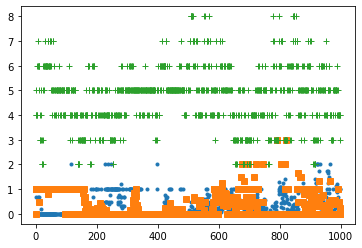

In [305]:
plt.plot(range(999),num,'.')

plt.plot(range(999),num1,'s')
plt.plot(range(999),rnum,'+')


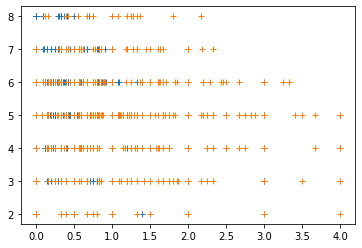

In [143]:
plt.plot(num,rnum1,'+')
plt.plot(num1,rnum1,'+')

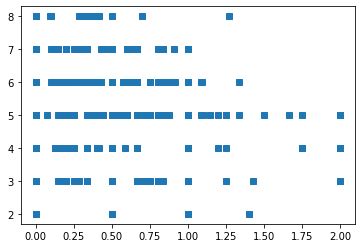

In [144]:
plt.plot(num,rnum1,'s')

In [145]:
np.where(np.asarray(num)[np.where(np.asarray(rnum)==2)]>1)

(array([30]),)

In [146]:
np.where(np.asarray(rnum)==2)[0][np.where(np.asarray(num1)[np.where(np.asarray(rnum)==2)]>0.75)]

array([ 21, 139, 140, 141, 143, 178, 180, 654, 656, 658, 699, 702, 912,
       914, 915, 916])

In [147]:
np.where(np.asarray(num)[np.where(np.asarray(rnum)==1)]>1)

(array([], dtype=int64),)

In [308]:
np.where(np.asarray(rnum1)==1)[0][np.where(np.asarray(num1)[np.where(np.asarray(rnum1)==1)]>1)]

array([611, 674, 684, 816, 819, 860, 865])

In [221]:
np.where(np.asarray(num1)[np.where(np.asarray(rnum)==1)]>1)[0].shape

(7,)

In [138]:
np.mean(np.asarray(num)[np.where(np.asarray(rnum)==0)])

0.02127659574468085

In [139]:
np.mean(np.asarray(num1)[np.where(np.asarray(rnum)==0)])

0.17127659574468085

net = dn.load_net(b"/Users/rsingh/Packages/darknet/cfg/yolov3.cfg", b"/Users/rsingh/Packages/darknet/yolov3.weights", 0)

meta = dn.load_meta(b"/Users/rsingh/Packages/darknet/cfg/coco.data")

thresh=.15
hier_thresh=.15 
nms=.45

num = c_int(0)
pnum = pointer(num)
dn.predict_image(net, im)


dets = dn.get_network_boxes(net, im.w, im.h, thresh, hier_thresh, None, 0, pnum)

num = pnum[0]
print(num)

resO = []
for j in range(num):
    for i in range(meta.classes):
        if dets[j].prob[i] > 0:
            b = dets[j].bbox
            resO.append((meta.names[i], dets[j].prob[i], (b.x, b.y, b.w, b.h)))

res = []
for j in range(num):
    for i in range(meta.classes):
        if dets[j].prob[i] > 0:
            b = dets[j].bbox
            res.append((meta.names[i], dets[j].prob[i], (b.x, b.y, b.w, b.h)))

pcd = o3d.io.read_point_cloud(os.path.join(dir_path,'kitti/')+'/3d/oyla_'+str(index).zfill(4)+'.xyz',format='xyz')

dist_flatten = filtered_phase.flatten()
indices_dist_flatten = np.where(dist_flatten>0)[0]

#rgb_ = np.zeros_like(filtered_phase)

a = ([],[])
for r in resO:
    #masked_dist = np.zeros_like(filtered_phase)
    (centerX, centerY, width, height) = r[2]
    bb = (int(centerX - (width / 2))-1, int(centerY - (height / 2))-1, int(centerX +(width / 2))+1,int(centerY + (height / 2))+1)
    #rgb_[bb[1]:bb[3],bb[0]:bb[2]] = 255
    masked_dist[bb[1]:bb[3],bb[0]:bb[2]] = dist[bb[1]:bb[3],bb[0]:bb[2]] 
    #a[0].extend(list(range(bb[1],bb[3])))
    #a[1].extend(list(range(bb[0],bb[2])))
#mask_indices = np.where(rgb_>=255)
#masked_indices_dist_flatten = np.ravel_multi_index(mask_indices,filtered_phase.shape)

_,_,_masked_indices = np.intersect1d(masked_indices_dist_flatten,indices_dist_flatten,return_indices=True)
masked_pcd = pcd.select_down_sample(_masked_indices)

o3d.visualization.draw_geometries([masked_pcd])

cmap = plt.get_cmap("tab20")

labels = np.array(pcd.cluster_dbscan(eps=100, min_points=10, print_progress=True))
max_label = labels.max()
print("has %d clusters" % (max_label + 1))

colors = cmap(labels / (max_label if max_label > 0 else 1))
colors[labels < 0] = 0
pcd.colors = o3d.utility.Vector3dVector(colors[:, :3])
o3d.visualization.draw_geometries([pcd])